Sampling Frequency: 360 Hz
360


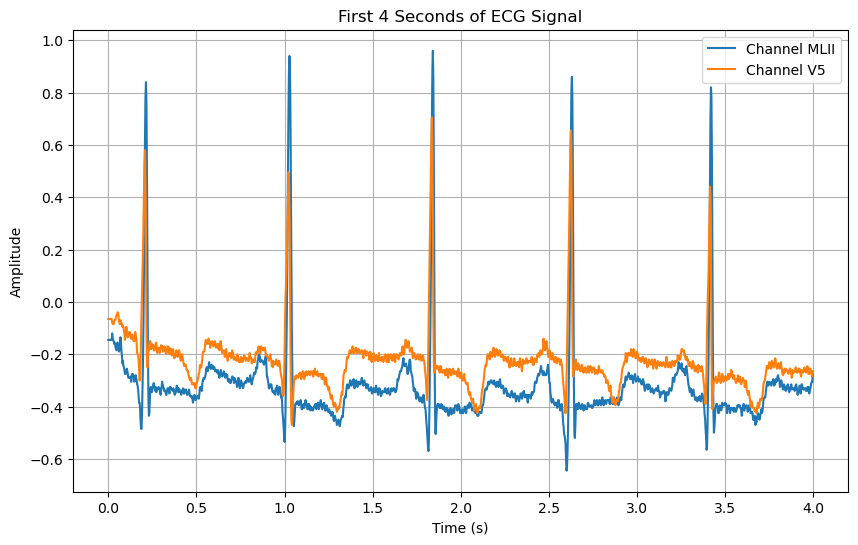

In [2]:
import wfdb
import matplotlib.pyplot as plt

# Specify the base filename (without extensions)
record_name = r'F:\university\milan\third semester\bio signal\final test\data\100'#Replace with your file path

# Read the ECG record
record = wfdb.rdrecord(record_name)

# Get the sampling frequency
fs = record.fs
print(f"Sampling Frequency: {fs} Hz")
print(fs)
# Calculate the number of samples for 4 seconds
duration_in_seconds = 4
num_samples = int(fs * duration_in_seconds)

# Extract the first 4 seconds of data
signal = record.p_signal  # This is a 2D NumPy array (rows=samples, columns=channels)
signal_4s = signal[:num_samples, :]  # First 'num_samples' rows, all channels

# Plot the extracted segment
time = [i / fs for i in range(num_samples)]  # Time vector for the 4-second segment
plt.figure(figsize=(10, 6))
for i in range(signal_4s.shape[1]):  # Loop over all channels
    plt.plot(time, signal_4s[:, i], label=f'Channel {record.sig_name[i]}')
plt.title('First 4 Seconds of ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


## knowing the record

In [4]:


# Display the fields of the record object
print("\nRecord Object Attributes:")
for attribute in dir(record):
    if not attribute.startswith('__') and not callable(getattr(record, attribute)):
        print(f"{attribute}: {getattr(record, attribute)}")


Record Object Attributes:
adc_gain: [200.0, 200.0]
adc_res: [11, 11]
adc_zero: [1024, 1024]
base_counter: None
base_date: None
base_datetime: None
base_time: None
baseline: [1024, 1024]
block_size: [0, 0]
byte_offset: [None, None]
checksum: [-22131, 20052]
comments: ['69 M 1085 1629 x1', 'Aldomet, Inderal']
counter_freq: None
d_signal: None
e_d_signal: None
e_p_signal: None
file_name: ['100.dat', '100.dat']
fmt: ['212', '212']
fs: 360
init_value: [995, 1011]
n_sig: 2
p_signal: [[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]
record_name: 100
samps_per_frame: [1, 1]
sig_len: 650000
sig_name: ['MLII', 'V5']
skew: [None, None]
units: ['mV', 'mV']


### cuting it

In [5]:
import wfdb
import scipy.io as sio
import os

# Specify the base filename (without extensions)
record_name = r'F:\university\milan\third semester\bio signal\final test\data\100' # Replace with your file path

# Read the ECG record
record = wfdb.rdrecord(record_name)

# Get the sampling frequency
fs = record.fs
print(f"Sampling Frequency: {fs} Hz")

# Calculate the number of samples for 4 seconds
duration_in_seconds = 4
num_samples = int(fs * duration_in_seconds)

# Extract the first 4 seconds of data
signal = record.p_signal  # This is a 2D NumPy array (rows=samples, columns=channels)
signal_4s = signal[:num_samples, :]  # First 'num_samples' rows, all channels

# Prepare data for saving
output_data = {
    'signal': signal_4s,       # The extracted signal
    'fs': fs,                 # Sampling frequency
    'duration': duration_in_seconds,  # Duration in seconds
    'channels': record.sig_name  # Channel names
}

# Save as .mat file in the same directory
output_path = os.path.dirname(record_name)  # Get directory of the original file
output_file = os.path.join(output_path, '06995_4s_segment.mat')
sio.savemat(output_file, output_data)

print(f"4-second signal saved to: {output_file}")


Sampling Frequency: 360 Hz
4-second signal saved to: F:\university\milan\third semester\bio signal\final test\data\06995_4s_segment.mat
